In [2]:
import lightkurve as lb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:

from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download()

<Axes: title={'center': 'Target ID: 8462852, Cadence: 66714'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

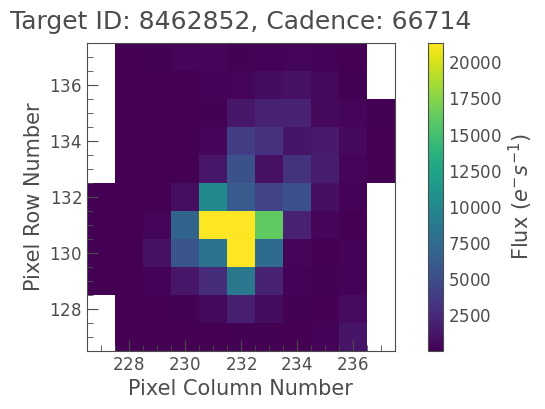

In [3]:
pixelfile.plot(frame=1)


In [4]:
lc = pixelfile.to_lightcurve(aperture_mask='all');

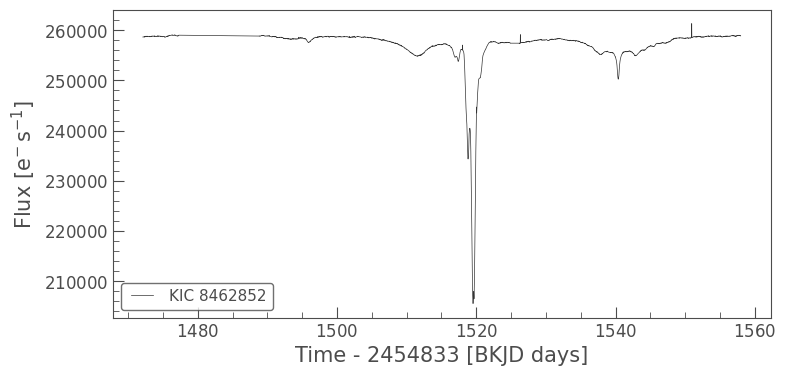

In [5]:
lc.plot();

In [6]:
tpf = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()

# Then we convert the target pixel file into a light curve using the pipeline-defined aperture mask.
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

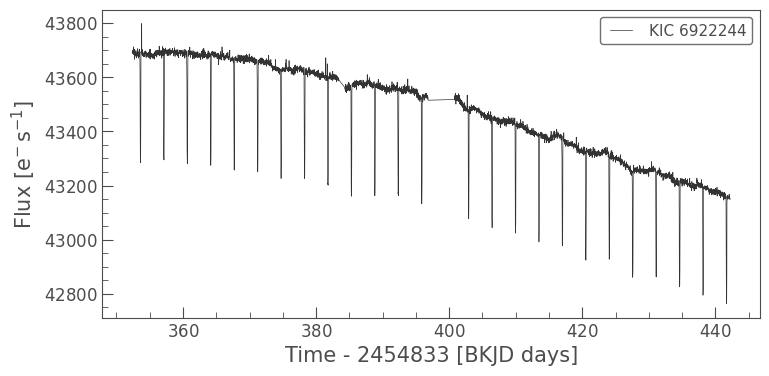

In [7]:
lc.plot()

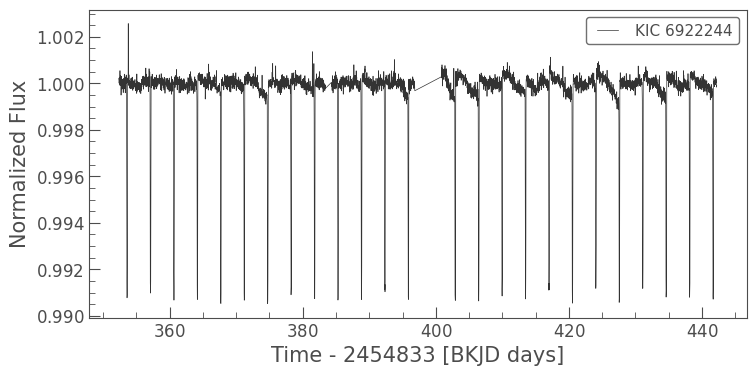

In [8]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

In [9]:
np.linspace(3, 4, 16)

array([3.        , 3.06666667, 3.13333333, 3.2       , 3.26666667,
       3.33333333, 3.4       , 3.46666667, 3.53333333, 3.6       ,
       3.66666667, 3.73333333, 3.8       , 3.86666667, 3.93333333,
       4.        ])

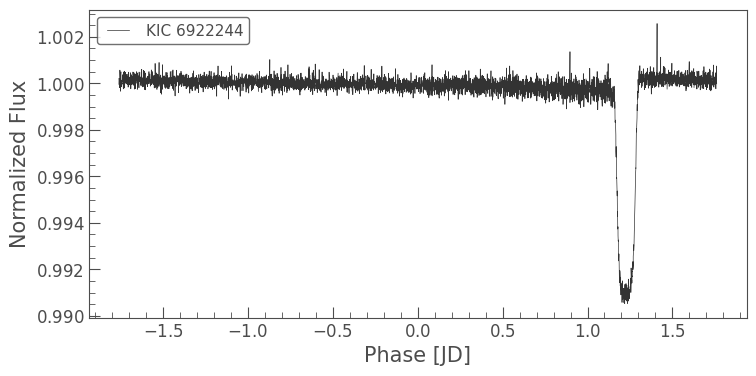

In [10]:
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot();



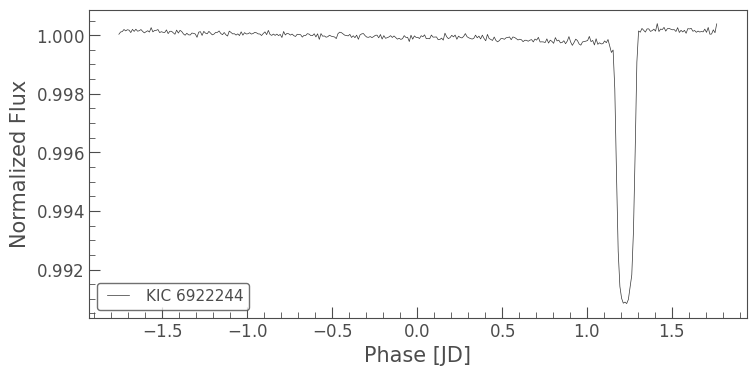

In [11]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot();


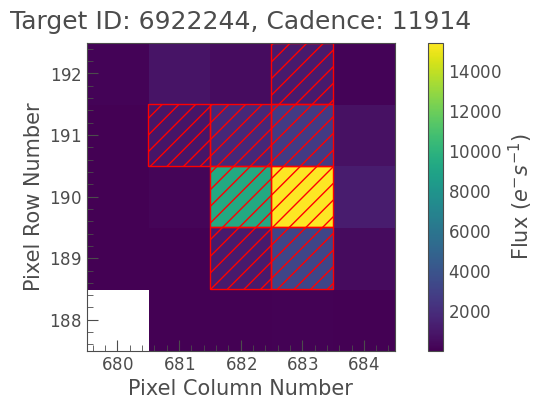

In [12]:
tpf.plot(aperture_mask=tpf.pipeline_mask);


In [13]:
tpf.hdu[1].header["TT*"]

TTYPE1  = 'TIME    '                                                            
TTYPE2  = 'TIMECORR'                                                            
TTYPE3  = 'CADENCENO'                                                           
TTYPE4  = 'RAW_CNTS'                                                            
TTYPE5  = 'FLUX    '                                                            
TTYPE6  = 'FLUX_ERR'                                                            
TTYPE7  = 'FLUX_BKG'                                                            
TTYPE8  = 'FLUX_BKG_ERR'                                                        
TTYPE9  = 'COSMIC_RAYS'                                                         
TTYPE10 = 'QUALITY '                                                            
TTYPE11 = 'POS_CORR1'                                                           
TTYPE12 = 'POS_CORR2'                                                           
TTYPE13 = 'RB_LEVEL'        

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

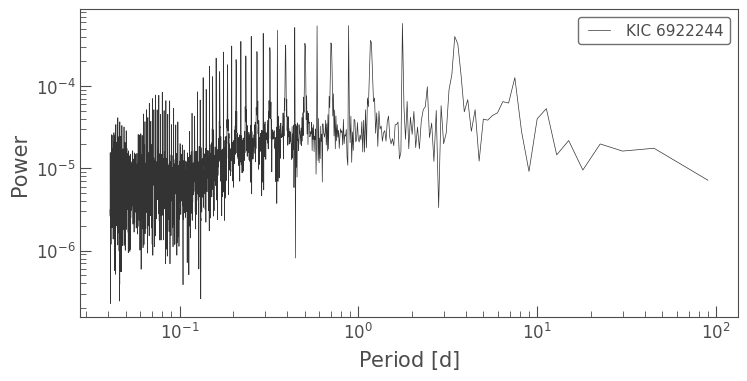

In [14]:
pg = flat_lc.to_periodogram(oversample_factor=1)
pg.plot(view='period', scale='log')

In [15]:
pg.period_at_max_power

<Quantity 1.76131724 d>

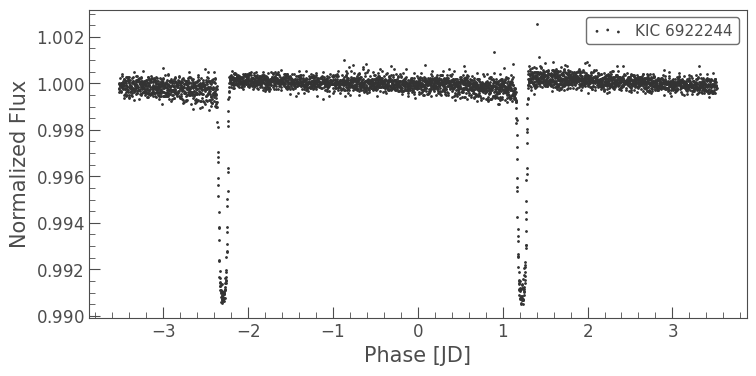

In [16]:
flat_lc.fold(period=pg.period_at_max_power*4).scatter();

In [12]:
tpf.interact(notebook_url='localhost:8889')

NameError: name 'tpf' is not defined

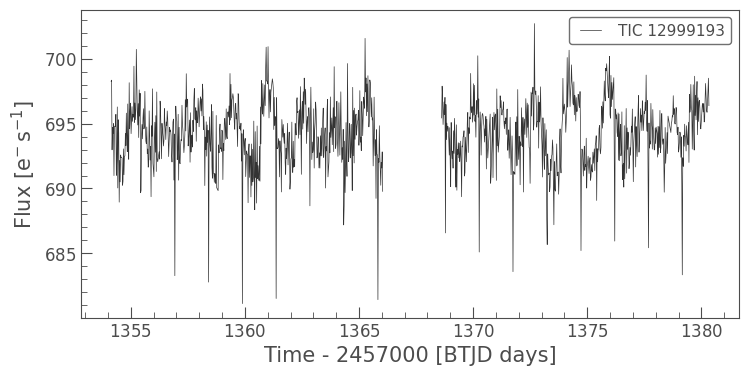

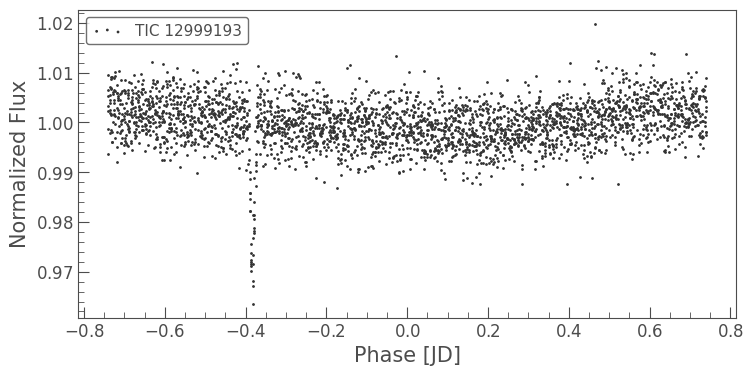

In [20]:
# Replace with the actual TIC ID you are interested in
tic_id = 'TIC 12999193'

# Search for the light curve data
search_result = lk.search_lightcurve(f"{tic_id}", mission='TESS')

# Download the light curve
lc = search_result.download_all()

# Plot the light curve
lc[0].plot()
lc[1].normalize().fold(period=1.48264).scatter();